<a href="https://colab.research.google.com/github/sandeepkumar9343/Currency-Detection/blob/main/Currency_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CURRENCY DETECTION**

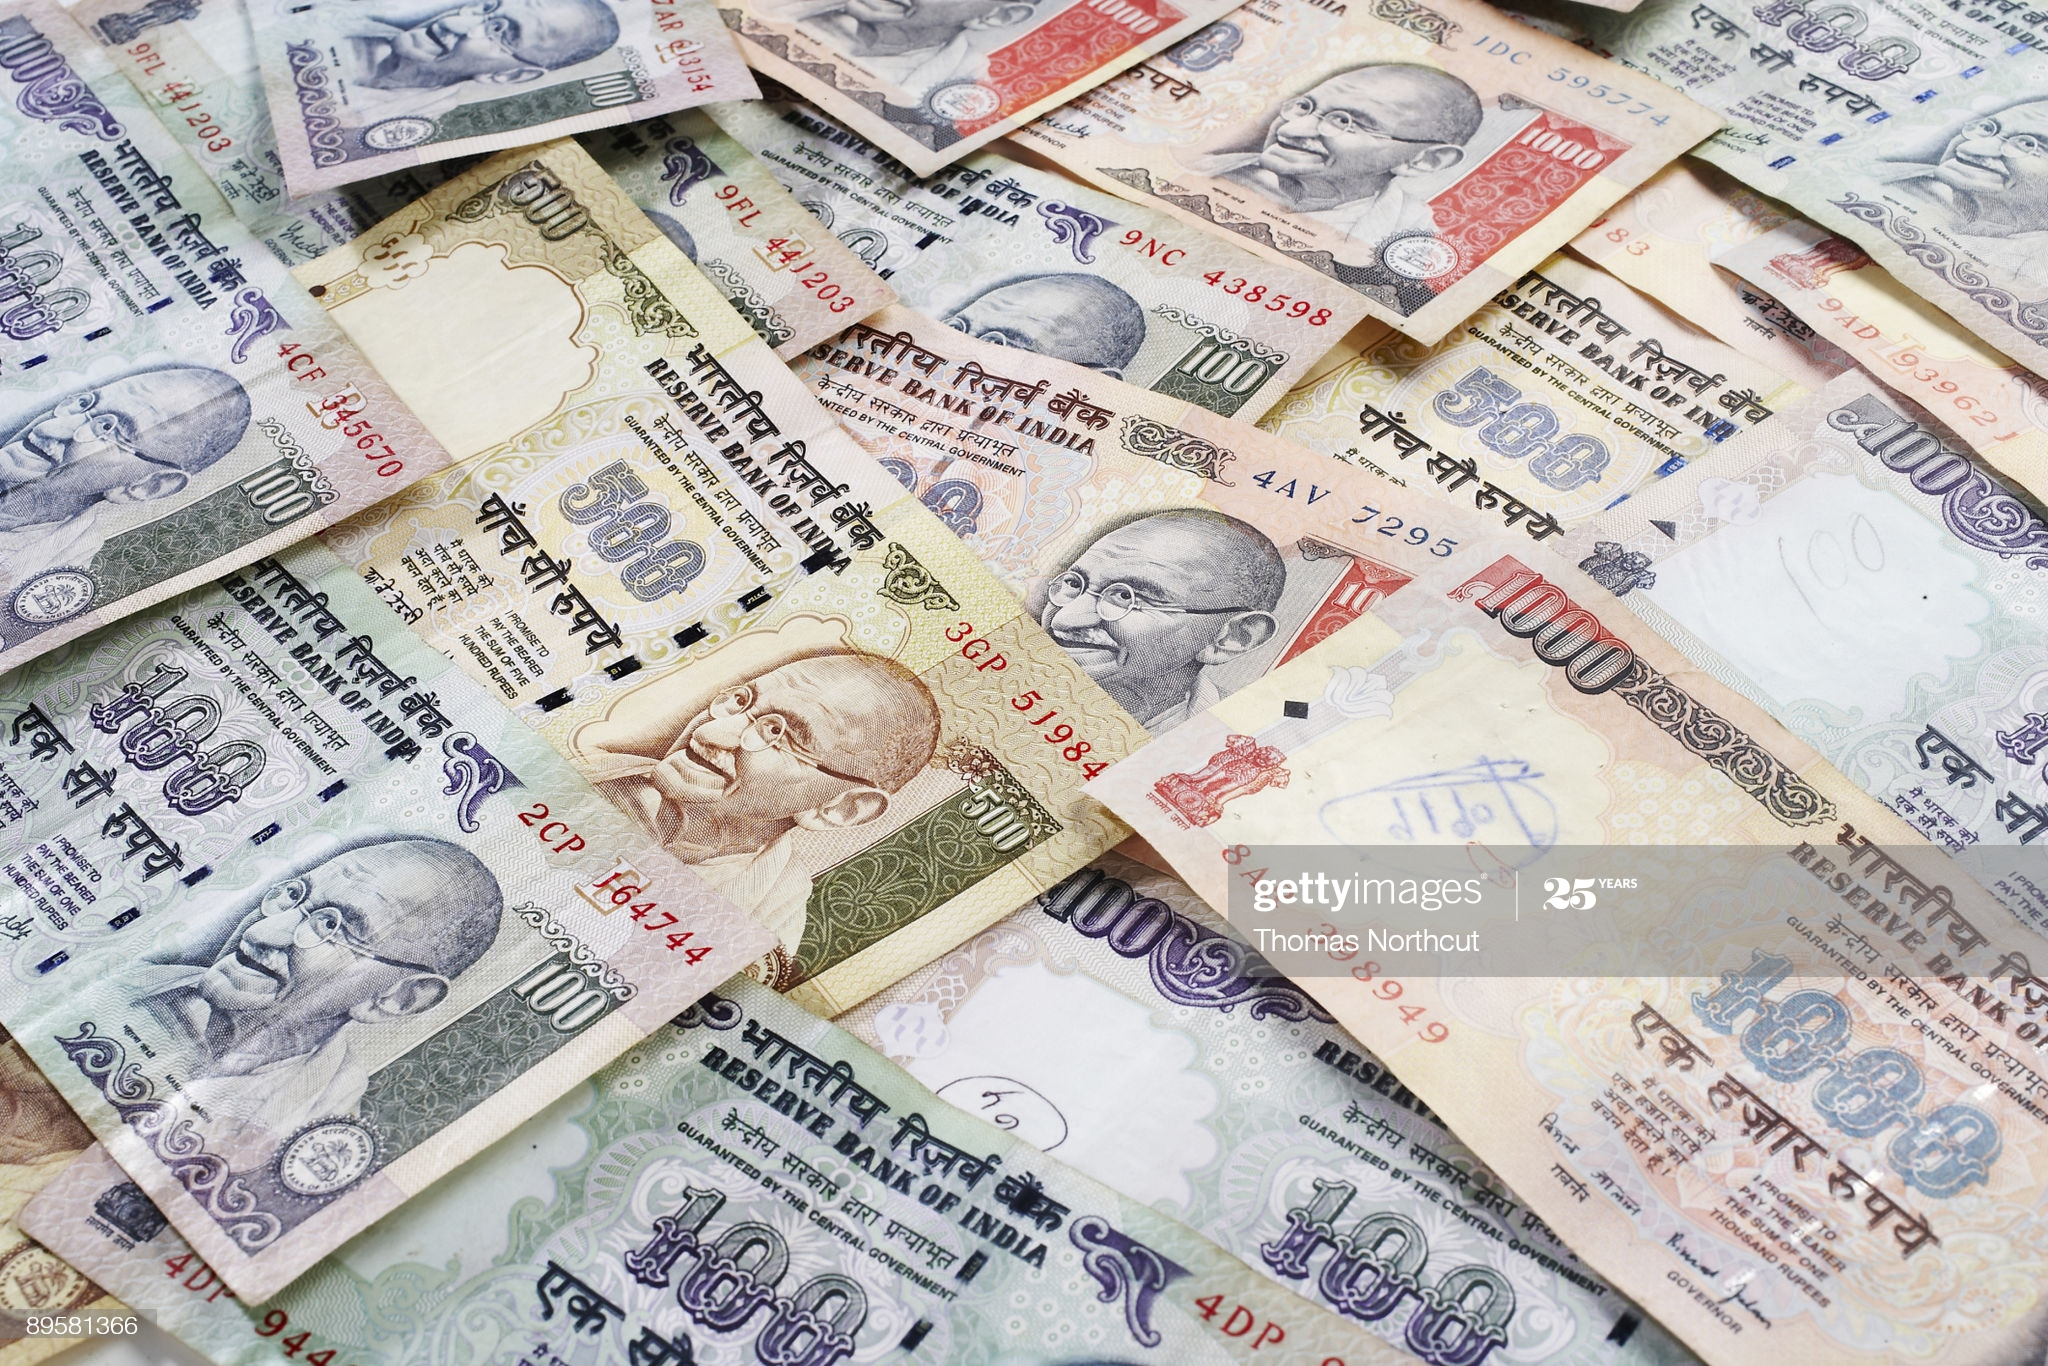

In [1]:
#Installing kaggle module in colab for downloading the dataset. 
!pip install -q kaggle

In [2]:
#making a kaggle directory.
!mkdir -p ~/.kaggle

In [3]:
!cp kaggle.json ~/.kaggle/

In [4]:
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
#Downloading the currency data from kaggle.
!kaggle datasets download -d shobhit18th/indian-currency-notes

 95% 275M/290M [00:04<00:00, 46.6MB/s]
100% 290M/290M [00:04<00:00, 67.8MB/s]


In [6]:
#moving downloaded data to new folder 'currencydata'.
!mkdir currencydata
!mv indian-currency-notes.zip currencydata

In [7]:
%cd currencydata/

/content/currencydata


In [9]:
#importing tensorflow library.
import tensorflow as tf
tf.__version__

'2.3.0'

In [10]:
import os
from warnings import filterwarnings
filterwarnings('ignore')

from sklearn import utils
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [11]:
#importing required libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from glob import glob
import keras

from keras.models import Model, Sequential
from keras.layers import Flatten, Dense, Dropout
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers import BatchNormalization, GlobalAveragePooling2D
from keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from keras.optimizers import Adam



In [13]:
train_path='/content/currencydata/indian_currency_new/training'
test_path='/content/currencydata/indian_currency_new/validation'

In [14]:
#checking no of folders in train data.each folders is of diff class.
folders=glob('/content/currencydata/indian_currency_new/training/*')

In [15]:
folders

['/content/currencydata/indian_currency_new/training/Background',
 '/content/currencydata/indian_currency_new/training/10',
 '/content/currencydata/indian_currency_new/training/20',
 '/content/currencydata/indian_currency_new/training/2000',
 '/content/currencydata/indian_currency_new/training/100',
 '/content/currencydata/indian_currency_new/training/200',
 '/content/currencydata/indian_currency_new/training/500',
 '/content/currencydata/indian_currency_new/training/50']

In [16]:
labels=['10','20','2000','100','200','500','50']

Text(0.5, 1.0, '10 Rupee Note')

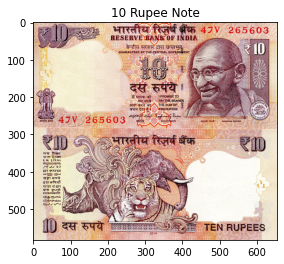

In [24]:
#visualizing sample image from 10 Rupee Note class.
plt.imshow(plt.imread('/content/currencydata/indian_currency_new/training/10/72.jpg'))
plt.title('10 Rupee Note')

Text(0.5, 1.0, '100 Rupee Note')

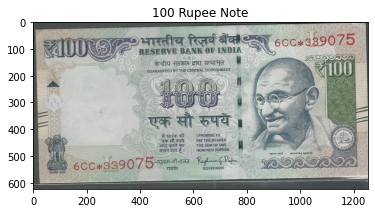

In [25]:
#visualizing sample image from 100 Rupee Note class.
plt.imshow(plt.imread('/content/currencydata/indian_currency_new/training/100/0.jpg'))
plt.title('100 Rupee Note')

Text(0.5, 1.0, '20 Rupee Note')

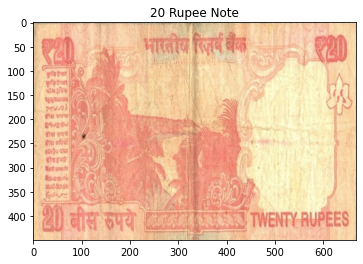

In [26]:
#visualizing sample image from 20 Rupee Note class.
plt.imshow(plt.imread('/content/currencydata/indian_currency_new/training/20/10.jpg'))
plt.title('20 Rupee Note')

Text(0.5, 1.0, '200 Rupee Note')

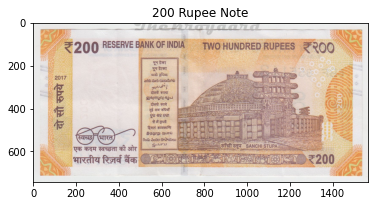

In [29]:
#visualizing sample image from 200 Rupee Note class.
plt.imshow(plt.imread('/content/currencydata/indian_currency_new/training/200/19.jpg'))
plt.title('200 Rupee Note')

Text(0.5, 1.0, '2000 Rupee Note')

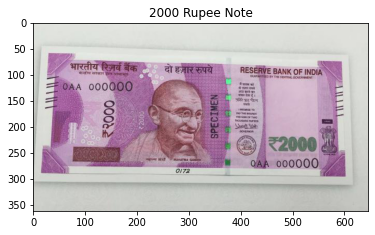

In [32]:
#visualizing sample image from 2000 Rupee Note class.
plt.imshow(plt.imread('/content/currencydata/indian_currency_new/training/2000/15.jpg'))
plt.title('2000 Rupee Note')

Text(0.5, 1.0, '50 Rupee Note')

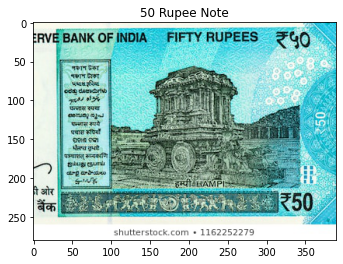

In [36]:
#visualizing sample image from 50 Rupee Note class.
plt.imshow(plt.imread('/content/currencydata/indian_currency_new/training/50/16.jpg'))
plt.title('50 Rupee Note')

Text(0.5, 1.0, '500 Rupee Note')

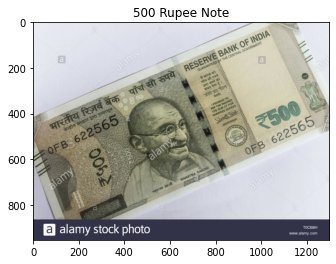

In [37]:
#visualizing sample image from 500 Rupee Note class.
plt.imshow(plt.imread('/content/currencydata/indian_currency_new/training/500/0.jpg'))
plt.title('500 Rupee Note')

# **Data Augmentation**

In [78]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True
                                 )

test_datagen=ImageDataGenerator(rescale=1./255)

In [79]:
training_set=train_datagen.flow_from_directory(train_path,
                                               target_size=(224,224),
                                               classes=labels,
                                               batch_size=32,
                                               class_mode='categorical')

Found 584 images belonging to 7 classes.


In [80]:
test_set=test_datagen.flow_from_directory(test_path,
                                          target_size=(224,224),
                                          batch_size=32,
                                          classes=labels,
                                          class_mode='categorical'
                                          )

Found 167 images belonging to 7 classes.


**Model Building**

In [81]:
model = Sequential()
model.add(Convolution2D(64, (3, 3), input_shape = (224, 224, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2), data_format="channels_last"))
model.add(Dropout(0.2))

model.add(Convolution2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2), data_format="channels_last"))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(activation = 'relu', units=256))
model.add(BatchNormalization(axis = -1))
model.add(Dropout(0.2))

model.add(Dense(activation = 'relu', units=64))
model.add(BatchNormalization(axis = -1))
model.add(Dropout(0.2))

model.add(Dense(activation = 'softmax', units=7))
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [82]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 222, 222, 64)      1792      
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 111, 111, 64)      0         
_________________________________________________________________
dropout_34 (Dropout)         (None, 111, 111, 64)      0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 109, 109, 32)      18464     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 54, 54, 32)        0         
_________________________________________________________________
dropout_35 (Dropout)         (None, 54, 54, 32)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 93312)            

In [83]:
history=model.fit(training_set,validation_data=test_set,epochs=25,verbose=1,shuffle=False)

Epoch 1/25
19/19 [==============================] - 20s 1s/step - loss: 2.1901 - accuracy: 0.2911 - val_loss: 2.2036 - val_accuracy: 0.1557
Epoch 2/25
19/19 [==============================] - 20s 1s/step - loss: 1.3575 - accuracy: 0.5103 - val_loss: 2.9439 - val_accuracy: 0.2635
Epoch 3/25
19/19 [==============================] - 20s 1s/step - loss: 1.1420 - accuracy: 0.5788 - val_loss: 1.1974 - val_accuracy: 0.4731
Epoch 4/25
19/19 [==============================] - 19s 1s/step - loss: 0.9423 - accuracy: 0.6387 - val_loss: 1.6215 - val_accuracy: 0.4431
Epoch 5/25
19/19 [==============================] - 19s 986ms/step - loss: 0.9035 - accuracy: 0.6695 - val_loss: 3.3195 - val_accuracy: 0.2096
Epoch 6/25
19/19 [==============================] - 19s 1s/step - loss: 0.9894 - accuracy: 0.6644 - val_loss: 2.1491 - val_accuracy: 0.4910
Epoch 7/25
19/19 [==============================] - 19s 1s/step - loss: 0.7875 - accuracy: 0.7277 - val_loss: 3.9396 - val_accuracy: 0.2695
Epoch 8/25
19/19 

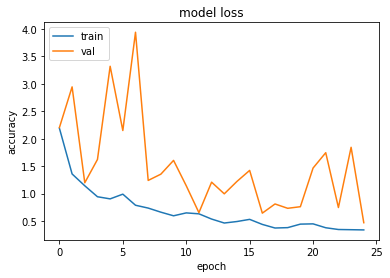

In [84]:
# Ploting the model loss for no of epochs.
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

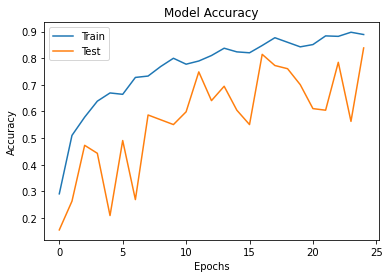

In [85]:
#plotting accuracy of no of epochs.
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'])
plt.show()

In [86]:
#prediction on test data
preds=model.predict(test_set)

In [87]:
preds

array([[2.45496556e-02, 3.25080287e-03, 3.62219464e-04, ...,
        9.58153725e-01, 1.20546650e-02, 4.42448163e-06],
       [1.05886174e-05, 8.93883850e-07, 1.72423006e-05, ...,
        2.62234043e-05, 1.34656975e-05, 9.28555983e-06],
       [8.29038024e-01, 1.21065676e-01, 4.89796861e-04, ...,
        6.68522995e-03, 4.17915930e-04, 3.90418954e-02],
       ...,
       [4.66018450e-03, 7.07785730e-05, 2.96319049e-05, ...,
        2.47461925e-04, 9.94540632e-01, 4.31747787e-04],
       [1.60498515e-04, 7.17520074e-04, 9.98268366e-01, ...,
        1.59205701e-05, 1.52802804e-05, 9.99780696e-06],
       [9.70510244e-01, 2.87527684e-04, 1.58513030e-05, ...,
        1.38512114e-02, 1.14597501e-02, 3.61360586e-03]], dtype=float32)

In [89]:
#considering highest predicted probability values from the diff classes.
y_pred = np.argmax(preds, axis=1)

In [90]:
y_pred

array([4, 3, 0, 2, 6, 1, 4, 0, 4, 3, 0, 6, 6, 6, 5, 0, 1, 0, 3, 2, 5, 0,
       0, 3, 0, 4, 2, 1, 5, 2, 6, 3, 3, 0, 0, 5, 6, 5, 0, 0, 6, 1, 3, 0,
       3, 5, 4, 1, 6, 4, 3, 0, 5, 3, 4, 0, 2, 5, 0, 3, 2, 0, 3, 4, 2, 5,
       1, 5, 4, 5, 6, 0, 5, 5, 0, 3, 5, 2, 0, 0, 6, 2, 4, 1, 5, 3, 5, 3,
       3, 6, 0, 5, 1, 6, 5, 4, 1, 3, 0, 3, 5, 5, 6, 4, 0, 4, 5, 5, 3, 4,
       2, 3, 0, 3, 6, 5, 2, 5, 1, 4, 2, 0, 4, 0, 3, 4, 5, 2, 4, 4, 3, 5,
       1, 0, 6, 3, 6, 4, 0, 2, 3, 5, 2, 5, 5, 4, 0, 5, 5, 5, 1, 1, 3, 3,
       0, 2, 2, 2, 6, 4, 3, 6, 3, 2, 5, 2, 0])

In [104]:
#reading a sample image from test data 
test_img=image.load_img('/content/currencydata/indian_currency_new/validation/2000/16.jpg',target_size=(224,224,3))

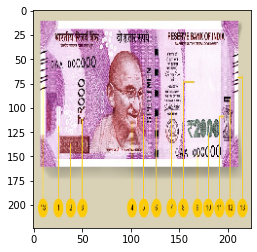

In [105]:
#visualising the sample image.
plt.imshow(test_img)

In [106]:
#converting the img to array for prediction.
x=image.img_to_array(test_img)

In [107]:
x.shape

(224, 224, 3)

In [108]:
#Expanding the dimension of the image.
x=np.expand_dims(x,axis=0)



In [110]:
result=model.predict_classes(x)

In [111]:
result

array([2])

In [112]:
labels

['10', '20', '2000', '100', '200', '500', '50']

In [113]:
#there are 7 different classes in the data.
class_dict = training_set.class_indices
class_dict

{'10': 0, '100': 3, '20': 1, '200': 4, '2000': 2, '50': 6, '500': 5}

In [124]:

#Defining a function which automatically read the image, standardize the image and perform prediction. 
def predict(filepath):
  img=image.load_img(filepath,target_size=(224,224,3))  #reading the image
  img=image.img_to_array(img)
  img_array=np.expand_dims(img,axis=0)
  preds=model.predict_classes(img_array)   #predicting the image.
  
 #Below condition statements returns the class associated with the images.
  if preds == 0:
    print("10 Rupee Note")
  elif preds == 1:
    print("20 Rupee Note")
  elif preds == 2:
    print("2000 Rupee Note")
  elif preds == 3:
    print("100 Rupee Note")
  elif preds == 4:
    print("200 Rupee Note")
  elif preds == 5:
    print("500 Rupee Note")
  else:
    print("50 Rupee Note")

In [130]:
#Our model incorrectly predicts the '10' as '50'.
predict('/content/currencydata/indian_currency_new/validation/10/53.jpg')

50 Rupee Note


In [128]:
#Our model coreectly predicts 20 as 20 Rupe
predict('/content/currencydata/indian_currency_new/validation/20/47.jpg')

20 Rupee Note


In [129]:
#Our model correctly predicts 2000 as 2000 Rupe
predict('/content/currencydata/indian_currency_new/validation/2000/25.jpg')

2000 Rupee Note


In [131]:
#Our model correctly predicts 100 as 100 Rupe
predict('/content/currencydata/indian_currency_new/validation/100/48.jpg')

100 Rupee Note


In [134]:
#Our model incorrectly predicts 200 as 20 Rupe
predict('/content/currencydata/indian_currency_new/validation/200/40.jpg')

20 Rupee Note


In [138]:
#Our model incorrectly predicts 500 as 2000 Rupe
predict('/content/currencydata/indian_currency_new/validation/500/24.jpg')

2000 Rupee Note


In [139]:
#Our model correctly predicts 50 as 50 Rupe
predict('/content/currencydata/indian_currency_new/validation/50/18.jpg')

50 Rupee Note
